In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data ingestion & inspection

In [2]:
sunspots = pd.read_csv('ISSN_D_tot.csv')
sunspots.head()

,1818,01,01.1,1818.004,-1,1
0,1818,1,2,1818.007,-1,1
1,1818,1,3,1818.010,-1,1
2,1818,1,4,1818.012,-1,1
3,1818,1,5,1818.015,-1,1
4,1818,1,6,1818.018,-1,1


In [3]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71860 entries, 0 to 71859
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1818      71860 non-null  int64  
 1   01        71860 non-null  int64  
 2   01.1      71860 non-null  int64  
 3   1818.004  71860 non-null  float64
 4    -1       71860 non-null  int64  
 5   1         71860 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.3 MB


In [5]:
# dando nome para as colunas
col_names = ['year', 'month', 'day', 'dec_date','sunspots', 'definite']
sunspots = pd.read_csv('ISSN_D_tot.csv', 
                       header=None, 
                       names=col_names, 
                       na_values={'sunspots':[' -1']}, 
                       parse_dates=[[0, 1, 2]])
sunspots.head()

,year_month_day,dec_date,sunspots,definite
0,1818-01-01,1818.004,NaN,1
1,1818-01-02,1818.007,NaN,1
2,1818-01-03,1818.010,NaN,1
3,1818-01-04,1818.012,NaN,1
4,1818-01-05,1818.015,NaN,1


In [7]:
#vamos ver como o info do dataframe mostra agora os nomes q demos
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71861 entries, 0 to 71860
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  71861 non-null  datetime64[ns]
 1   dec_date        71861 non-null  float64       
 2   sunspots        68614 non-null  float64       
 3   definite        71861 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.2 MB


In [6]:
sunspots.index = sunspots['year_month_day']
sunspots.index.name = 'date'
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71861 entries, 1818-01-01 to 2014-09-30
Data columns (total 4 columns):
year_month_day    71861 non-null datetime64[ns]
dec_date          71861 non-null float64
sunspots          68614 non-null float64
definite          71861 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.7 MB


In [9]:
#neste exemplo já fazemos o read definindo uma index_col 
aapl = pd.read_csv('aapl.csv', index_col='Date', parse_dates=True)
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [10]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6081 entries, 2008-10-14 to 1984-09-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6081 non-null   float64
 1   High       6081 non-null   float64
 2   Low        6081 non-null   float64
 3   Close      6081 non-null   float64
 4   Volume     6081 non-null   int64  
 5   Adj Close  6081 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 332.6 KB


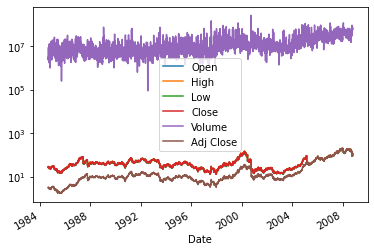

In [11]:
#aqui ele plota todas as colunas do dataframe, pois eu não
#falei pra ele qual eu queria
aapl.plot();
plt.yscale('log')
plt.savefig('aapl.png')

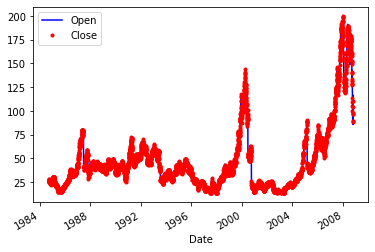

In [13]:
aapl['Open'].plot(color='b', style='-', legend=True);
aapl['Close'].plot(color='r', style='.', legend=True);

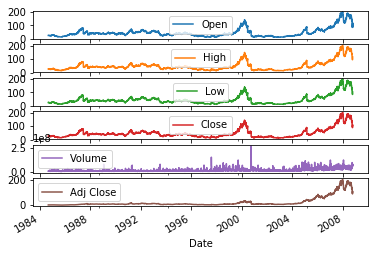

In [11]:
aapl.plot(subplots = True);

## 2. Exploratory data analysis

In [12]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


Text(0, 0.5, 'Fuel efficiency (mpg)')

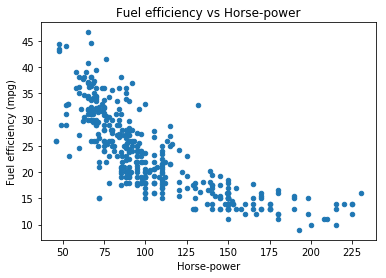

In [13]:
df.plot(kind='scatter', x='hp', y='mpg');

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

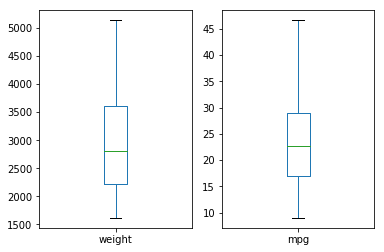

In [14]:
# Make a list of the column names to be plotted: cols
cols = ['weight','mpg']

# Generate the box plots
df[cols].plot(kind = 'box', subplots = True);

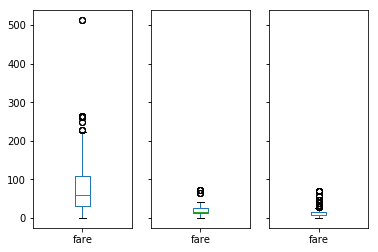

In [15]:
titanic = pd.read_csv('titanic.csv')
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

## 3. Time series in pandas

### Creating and using a DatetimeIndex

In [16]:
df = pd.read_csv('weather_data_austin_2010.csv')

# Prepare a format string: time_format
time_format ='%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
df['Date'] = pd.to_datetime(df['Date'], format=time_format)  

df.index = df['Date']

df.drop('Date', axis = 1, inplace = True)

df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


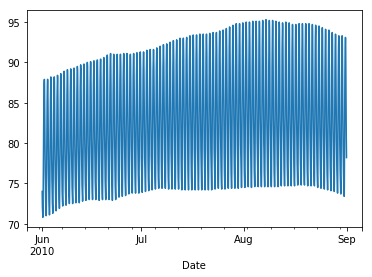

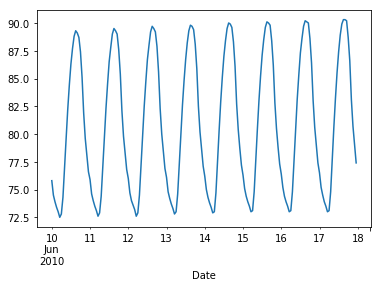

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot the summer data
df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()
# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()

In [18]:
ts0 = df['Temperature']
ts0.head()

Date
2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
Name: Temperature, dtype: float64

### Partial string indexing and slicing

In [19]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']

ts1, ts2, ts3

(Date
 2010-10-11 21:00:00    69.0
 2010-10-11 22:00:00    67.7
 Name: Temperature, dtype: float64, Date
 2010-07-04 00:00:00    77.6
 2010-07-04 01:00:00    76.3
 2010-07-04 02:00:00    75.5
 2010-07-04 03:00:00    74.9
 2010-07-04 04:00:00    74.6
 2010-07-04 05:00:00    74.2
 2010-07-04 06:00:00    74.4
 2010-07-04 07:00:00    76.0
 2010-07-04 08:00:00    79.0
 2010-07-04 09:00:00    81.8
 2010-07-04 10:00:00    84.6
 2010-07-04 11:00:00    86.8
 2010-07-04 12:00:00    88.9
 2010-07-04 13:00:00    90.1
 2010-07-04 14:00:00    91.1
 2010-07-04 15:00:00    91.6
 2010-07-04 16:00:00    91.5
 2010-07-04 17:00:00    90.7
 2010-07-04 18:00:00    89.5
 2010-07-04 19:00:00    87.3
 2010-07-04 20:00:00    84.0
 2010-07-04 21:00:00    81.8
 2010-07-04 22:00:00    80.0
 2010-07-04 23:00:00    78.5
 Name: Temperature, dtype: float64, Date
 2010-12-15 00:00:00    48.0
 2010-12-15 01:00:00    47.2
 2010-12-15 02:00:00    46.5
 2010-12-15 03:00:00    46.0
 2010-12-15 04:00:00    45.6
 2010-12-15 0

### Reindexing the Index

In [20]:
# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method = 'ffill')
ts4

Date
2010-10-11 21:00:00    78.5
2010-10-11 22:00:00    78.5
Name: Temperature, dtype: float64

### Resampling and frequency

In [21]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
df1, df2

(Date
 2010-01-01 00:00:00    44.200000
 2010-01-01 06:00:00    45.933333
 2010-01-01 12:00:00    57.766667
 2010-01-01 18:00:00    49.450000
 2010-01-02 00:00:00    44.516667
 2010-01-02 06:00:00    46.350000
 2010-01-02 12:00:00    58.366667
 2010-01-02 18:00:00    49.950000
 2010-01-03 00:00:00    44.783333
 2010-01-03 06:00:00    46.483333
 2010-01-03 12:00:00    58.450000
 2010-01-03 18:00:00    49.883333
 2010-01-04 00:00:00    44.583333
 2010-01-04 06:00:00    46.316667
 2010-01-04 12:00:00    58.316667
 2010-01-04 18:00:00    49.700000
 2010-01-05 00:00:00    44.550000
 2010-01-05 06:00:00    46.416667
 2010-01-05 12:00:00    58.516667
 2010-01-05 18:00:00    49.883333
 2010-01-06 00:00:00    44.683333
 2010-01-06 06:00:00    46.250000
 2010-01-06 12:00:00    58.166667
 2010-01-06 18:00:00    49.616667
 2010-01-07 00:00:00    44.383333
 2010-01-07 06:00:00    46.000000
 2010-01-07 12:00:00    58.116667
 2010-01-07 18:00:00    49.466667
 2010-01-08 00:00:00    44.200000
 2010-01

### Separating and resampling

In [22]:
# Extract temperature data for August: august
august = df['Temperature'].loc['2010-August']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature'].loc['2010-February']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()
august_highs, february_lows

(Date
 2010-08-01    95.0
 2010-08-02    95.0
 2010-08-03    95.1
 2010-08-04    95.1
 2010-08-05    95.1
 2010-08-06    95.2
 2010-08-07    95.3
 2010-08-08    95.2
 2010-08-09    95.2
 2010-08-10    95.1
 2010-08-11    95.0
 2010-08-12    94.9
 2010-08-13    95.0
 2010-08-14    94.9
 2010-08-15    94.7
 2010-08-16    94.7
 2010-08-17    94.8
 2010-08-18    94.8
 2010-08-19    94.8
 2010-08-20    94.8
 2010-08-21    94.7
 2010-08-22    94.6
 2010-08-23    94.5
 2010-08-24    94.3
 2010-08-25    94.1
 2010-08-26    94.0
 2010-08-27    93.7
 2010-08-28    93.5
 2010-08-29    93.3
 2010-08-30    93.3
 2010-08-31    93.1
 Freq: D, Name: Temperature, dtype: float64, Date
 2010-02-01    43.8
 2010-02-02    44.3
 2010-02-03    44.6
 2010-02-04    44.5
 2010-02-05    44.3
 2010-02-06    44.1
 2010-02-07    44.3
 2010-02-08    44.7
 2010-02-09    44.7
 2010-02-10    44.9
 2010-02-11    45.2
 2010-02-12    45.5
 2010-02-13    46.0
 2010-02-14    46.6
 2010-02-15    46.9
 2010-02-16    47.1
 201

### Rolling mean and frequency

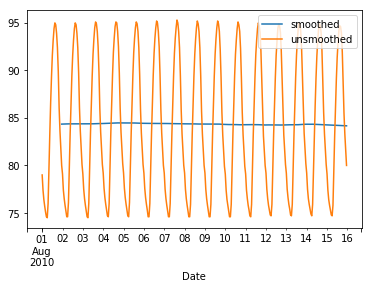

In [23]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window = 24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

### Resample and roll with it

In [24]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-August']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window = 7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


### Missing values and interpolation

In [25]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how = 'linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = abs(ts1 -ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Temperature, dtype: float64


### Method chaining and filtering

In [26]:
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', header = 10, parse_dates = True, index_col = 'Date (MM/DD/YYYY)')
df['Date (MM/DD/YYYY)'] = df.index
df['Date (MM/DD/YYYY)'] = df['Date (MM/DD/YYYY)'].astype('str')
df.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17,Date (MM/DD/YYYY)
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01


In [27]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()

In [28]:
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

### Time zones and conversion

In [29]:
# Build a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime(la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'])

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')


# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')


In [30]:
times_tz_pacific.head()

Date (MM/DD/YYYY)
2015-07-01   2015-07-01 03:43:00-07:00
2015-07-01   2015-07-01 14:27:00-07:00
2015-07-02   2015-07-02 03:47:00-07:00
2015-07-02   2015-07-02 14:23:00-07:00
2015-07-03   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

## 4. Case Study- Sunlight in Austin

In [31]:
columns = pd.read_csv('column_labels.txt')
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.txt',header = None, names = columns)
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']
df_dropped = df.drop(list_to_drop, axis = 'columns')
df_dropped.head()

/Users/gustavorodriguessilveira/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


### Cleaning and tidying datetime data

In [32]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


### Cleaning the numeric columns

In [33]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors= 'coerce')

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors= 'coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors= 'coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
df_clean.loc['2011-06-20 8:00:00':'2011-06-20 9:00:00', :].sample(5)

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-06-20 08:32:00,13904,20110620,0832,12,M,NaN,NaN,M,M,M,NaN,M,M,NaN,M,M,M
2011-06-20 08:27:00,13904,20110620,0827,12,M,NaN,NaN,M,M,M,NaN,M,M,NaN,M,M,M
2011-06-20 08:33:00,13904,20110620,0833,12,M,NaN,NaN,M,M,M,NaN,M,M,NaN,M,M,M
2011-06-20 08:28:00,13904,20110620,0828,12,M,NaN,NaN,M,M,M,NaN,M,M,NaN,M,M,M
2011-06-20 08:31:00,13904,20110620,0831,12,M,NaN,NaN,M,M,M,NaN,M,M,NaN,M,M,M


### Signal min, max, median

In [ ]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan','dry_bulb_faren'].median())

In [ ]:
df_clean.dtypes

In [ ]:
df_climate = pd.read_csv('weather_data_austin_2010.csv', parse_dates = True, index_col = 'Date')
df_climate.head()

In [ ]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
difference.head()

### Sunny or cloudy

In [ ]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

In [ ]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

In [ ]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

### Weekly average temperature and wind speed

In [ ]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean =df_clean[['wind_speed', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

In [ ]:
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

### Daily hours of clear sky

In [ ]:
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')
sunny_hours = resampled.sum()
total_hours = resampled.count()
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

### Heat or humidity

In [ ]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind = 'hist', bins = 8, alpha = 0.5, subplots = True)

# Show the plot
plt.show()

### Probability of high temperatures

In [ ]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug','Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeds august_max: august_2011_high

august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', density=True, cumulative=True, bins=25)

# Display the plot
plt.show()